In [1]:
import pandas as pd
df = pd.read_csv("merged_data.csv")
print(df.head(5))

   course_id course_type_broad   unit_id  unit_level_code unit_level_name  \
0     2951.0     Undergraduate  182243.0              0.0           Other   
1     2951.0     Undergraduate  213920.0              0.0           Other   
2     2951.0     Undergraduate  220770.0              0.0           Other   
3     2954.0     Undergraduate  182243.0              0.0           Other   
4     2976.0     Undergraduate  182243.0              0.0           Other   

       unit_foe_detailed        unit_foe_narrow  foe_code  \
0  Mathematical Sciences  Mathematical Sciences     10100   
1  Mathematical Sciences  Mathematical Sciences     10100   
2  Mathematical Sciences  Mathematical Sciences     10100   
3  Mathematical Sciences  Mathematical Sciences     10100   
4  Mathematical Sciences  Mathematical Sciences     10100   

                  unit_foe_broad  eftsl_2024  ... is_funding_cluster_variable  \
0  Natural And Physical Sciences       0.500  ...                          No   
1  Natur

In [2]:
df["foe_error"].value_counts()

foe_error
0.0    17891
1.0        2
Name: count, dtype: int64

In [12]:
print((df["funding_type"] == "C'wealth Supported").sum())

10528


In [13]:
print((df["commonwealth_contrib_2024"]).sum())

201137774.0


In [4]:
CSP_Student = df[df["funding_type"] == "C'wealth Supported"]
CSP_Student.head(5)

,course_id,course_type_broad,unit_id,unit_level_code,unit_level_name,unit_foe_detailed,unit_foe_narrow,foe_code,unit_foe_broad,eftsl_2024,...,is_funding_cluster_variable,special_course_code,max_contrib_indicator,foe_detailed_title,foe_detailed,foe_narrow,foe_broad,foe_error,special_code,CSP_gov_payment
0,2951.0,Undergraduate,182243.0,0.0,Other,Mathematical Sciences,Mathematical Sciences,10100,Natural And Physical Sciences,0.500,...,No,No,No,Mathematical Sciences,Mathematical Sciences,Mathematical Sciences,NATURAL AND PHYSICAL SCIENCES,0.0,0.0,7457.500
1,2951.0,Undergraduate,213920.0,0.0,Other,Mathematical Sciences,Mathematical Sciences,10100,Natural And Physical Sciences,0.750,...,No,No,No,Mathematical Sciences,Mathematical Sciences,Mathematical Sciences,NATURAL AND PHYSICAL SCIENCES,0.0,0.0,11186.250
2,2951.0,Undergraduate,220770.0,0.0,Other,Mathematical Sciences,Mathematical Sciences,10100,Natural And Physical Sciences,0.500,...,No,No,No,Mathematical Sciences,Mathematical Sciences,Mathematical Sciences,NATURAL AND PHYSICAL SCIENCES,0.0,0.0,7457.500
3,2954.0,Undergraduate,182243.0,0.0,Other,Mathematical Sciences,Mathematical Sciences,10100,Natural And Physical Sciences,0.125,...,No,No,No,Mathematical Sciences,Mathematical Sciences,Mathematical Sciences,NATURAL AND PHYSICAL SCIENCES,0.0,0.0,1864.375
4,2976.0,Undergraduate,182243.0,0.0,Other,Mathematical Sciences,Mathematical Sciences,10100,Natural And Physical Sciences,0.250,...,No,No,No,Mathematical Sciences,Mathematical Sciences,Mathematical Sciences,NATURAL AND PHYSICAL SCIENCES,0.0,0.0,3728.750


# Export to CSV and read the file

In [15]:
CSP_Student.to_csv("CSP_student.csv", index=False)

In [1]:
import pandas as pd
CSP_Student = pd.read_csv("csp_Student.csv")

# EDA Data exploration

In [3]:
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format

In [4]:
print(CSP_Student.columns)

Index(['course_id', 'course_type_broad', 'unit_id', 'unit_level_code',
       'unit_level_name', 'unit_foe_detailed', 'unit_foe_narrow', 'foe_code',
       'unit_foe_broad', 'eftsl_2024', 'funding_nation', 'funding_type',
       'funding_cluster', 'max_student_contrib_2024',
       'commonwealth_contrib_2024', 'max_student_contrib_gf_2024',
       'commonwealth_contrib_gf_2024', 'is_funding_cluster_variable',
       'special_course_code', 'max_contrib_indicator', 'foe_detailed_title',
       'foe_detailed', 'foe_narrow', 'foe_broad', 'foe_error', 'special_code',
       'CSP_student_contribution', 'CSP_commonwealth_contribution'],
      dtype='object')


In [6]:
# Group by funding cluster
funding_summary = CSP_Student.groupby("funding_cluster")["CSP_commonwealth_contribution"].agg(count="count",mean="mean",median="median",min="min",max="max",std="std").reset_index()
print(funding_summary)

     funding_cluster  count       mean    median      min          max  \
0  Funding Cluster 1   3455   1,584.75    309.00    77.25    96,717.00   
1  Funding Cluster 2   2619  18,260.05  3,728.75 1,864.38 1,193,200.00   
2  Funding Cluster 3   3878  19,504.23  4,573.00 2,286.50   804,848.00   
3  Funding Cluster 4    210 156,932.28 15,197.50 3,799.38 2,948,315.00   

         std  
0   4,791.42  
1  48,020.41  
2  52,152.89  
3 431,637.63  


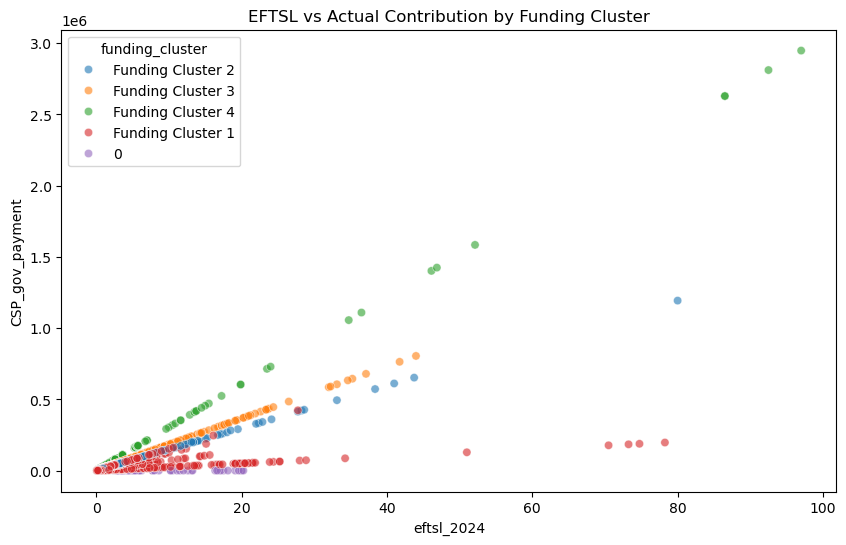

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=CSP_Student,
    x="eftsl_2024",
    y="CSP_gov_payment",
    hue="funding_cluster",
    alpha=0.6
)
plt.title("EFTSL vs Actual Contribution by Funding Cluster")
plt.show()


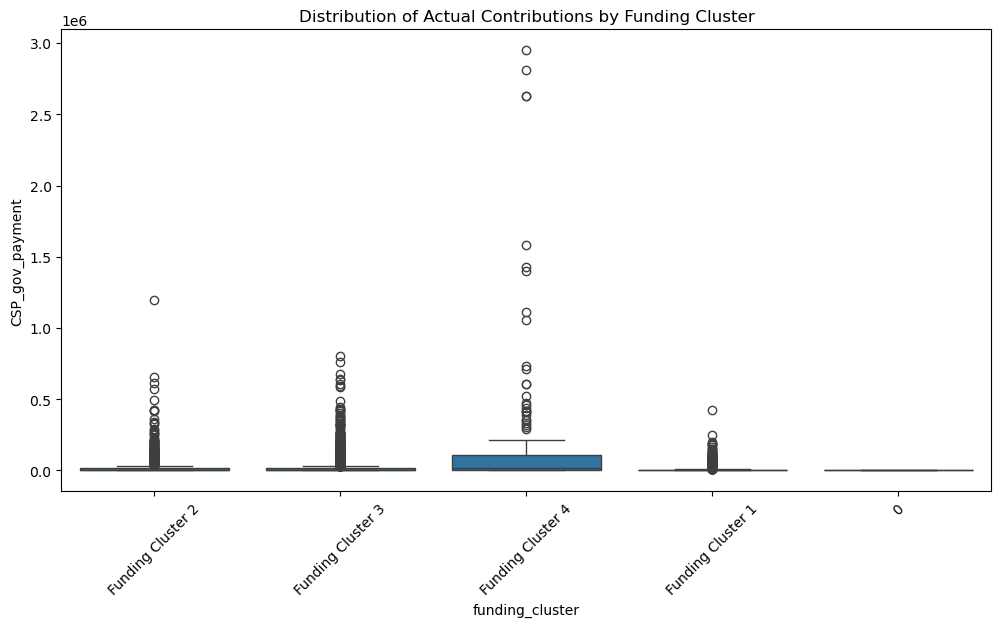

In [17]:
import seaborn as sns

plt.figure(figsize=(12,6))
sns.boxplot(x="funding_cluster", y="CSP_gov_payment", data=CSP_Student)
plt.xticks(rotation=45)
plt.title("Distribution of Actual Contributions by Funding Cluster")
plt.show()


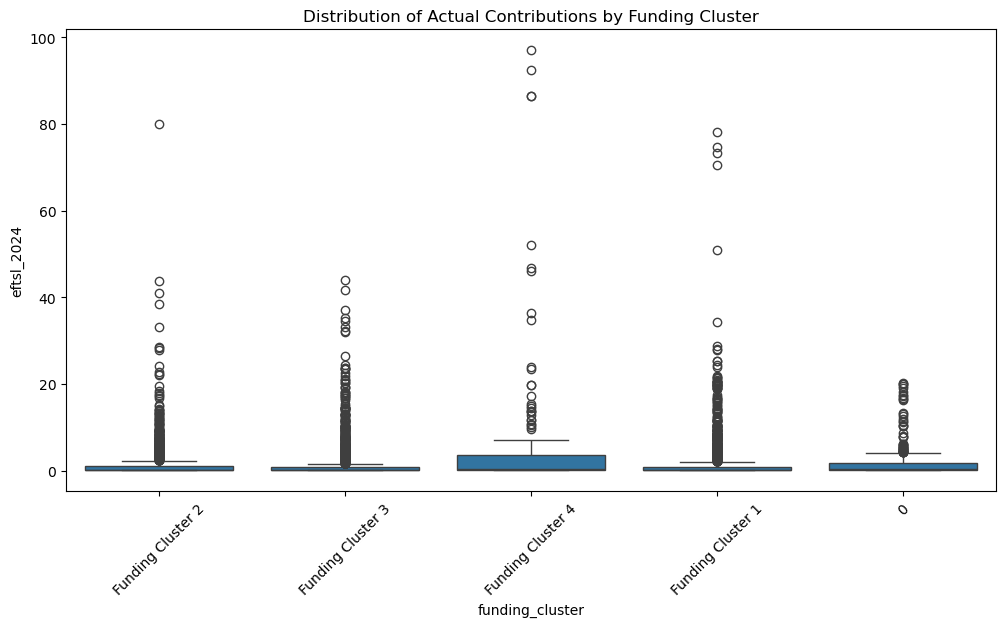

In [18]:
import seaborn as sns

plt.figure(figsize=(12,6))
sns.boxplot(x="funding_cluster", y="eftsl_2024", data=CSP_Student)
plt.xticks(rotation=45)
plt.title("Distribution of Actual Contributions by Funding Cluster")
plt.show()

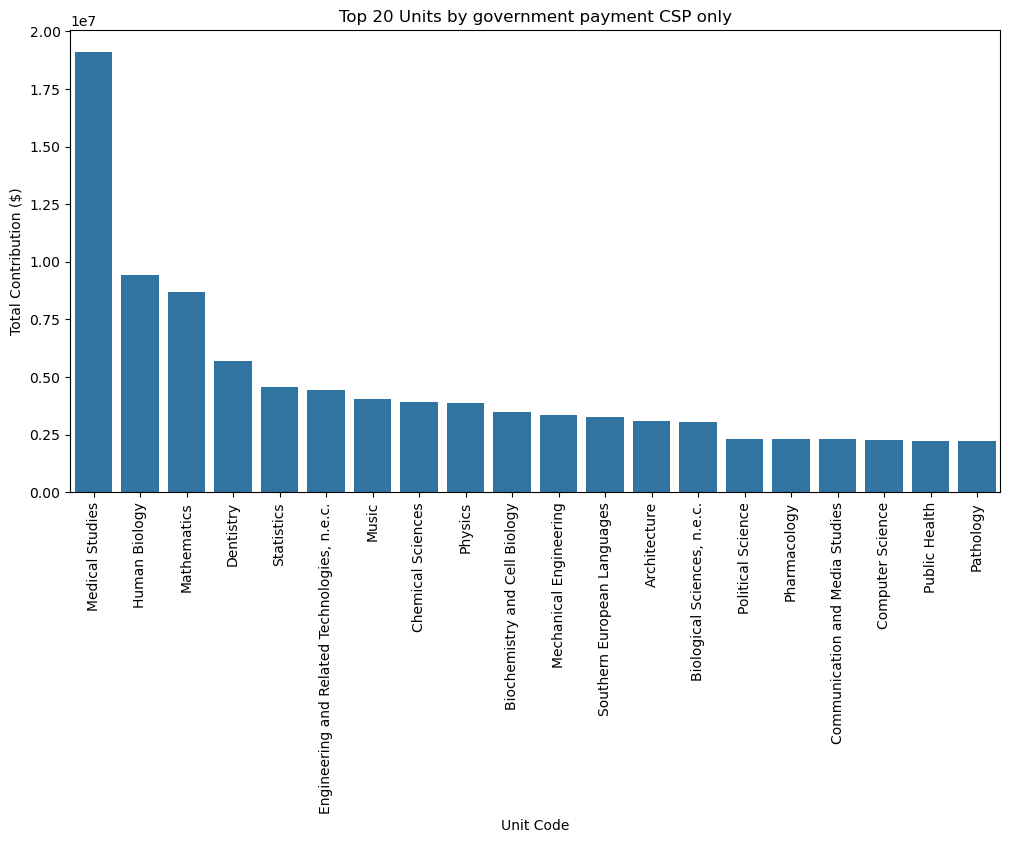

In [19]:
unit_totals = CSP_Student.groupby("foe_detailed_title")["CSP_gov_payment"].sum().reset_index().sort_values("CSP_gov_payment", ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x="foe_detailed_title", y="CSP_gov_payment", data=unit_totals.head(20)) 
plt.title("Top 20 Units by government payment CSP only")
plt.ylabel("Total Contribution ($)")
plt.xlabel("Unit Code")
plt.xticks(rotation=90)
plt.show()


In [9]:
# Summarise EFTSL by funding cluster and unit
eftsl_summary = (CSP_Student.groupby("funding_cluster")
                 .agg(eftsl_sum=("eftsl_2024", "sum"),
          commonwealth_contribution_sum=("CSP_commonwealth_contribution", "sum")).reset_index().sort_values(["funding_cluster", "commonwealth_contribution_sum"], ascending=[True, False]))
print(eftsl_summary)


     funding_cluster  eftsl_sum  commonwealth_contribution_sum
0  Funding Cluster 1   4,429.88                   5,475,325.50
1  Funding Cluster 2   3,206.38                  47,823,083.12
2  Funding Cluster 3   4,135.00                  75,637,420.00
3  Funding Cluster 4   1,084.25                  32,955,778.75


# Data Preprocseeing and rules applied

In [7]:
print(CSP_Student.columns)

Index(['course_id', 'course_type_broad', 'unit_id', 'unit_level_code',
       'unit_level_name', 'unit_foe_detailed', 'unit_foe_narrow', 'foe_code',
       'unit_foe_broad', 'eftsl_2024', 'funding_nation', 'funding_type',
       'funding_cluster', 'max_student_contrib_2024',
       'commonwealth_contrib_2024', 'max_student_contrib_gf_2024',
       'commonwealth_contrib_gf_2024', 'is_funding_cluster_variable',
       'special_course_code', 'max_contrib_indicator', 'foe_detailed_title',
       'foe_detailed', 'foe_narrow', 'foe_broad', 'foe_error', 'special_code',
       'CSP_student_contribution', 'CSP_commonwealth_contribution'],
      dtype='object')


In [ ]:
print(CSP_Student[""]

In [9]:
# Calculation for expected, different and ratio amount
import numpy as np

CSP_Student.loc[:, "gf_total_contribution"] = CSP_Student["max_student_contrib_gf_2024"] * CSP_Student["eftsl_2024"]
CSP_Student.loc[:, "different_amount"] = ((CSP_Student["CSP_commonwealth_contribution"] - CSP_Student["gf_total_contribution"])/CSP_Student["expected_fee"])
CSP_Student.loc[:, "diff_ratio"] = CSP_Student["CSP_gov_payment"] / CSP_Student["expected_fee"]
CSP_Student.loc[:, "fee_mismatch"] = np.where(CSP_Student["different_amount_percentage"] > 0.10, 1, 0)
CSP_Student.loc[:, "cluster_mismatch"] = np.where(CSP_Student["funding_cluster"] == "0", 1, 0)

In [10]:
pd.crosstab(CSP_Student["fee_mismatch"], CSP_Student["cluster_mismatch"])

cluster_mismatch,0,1
fee_mismatch,,
0,6707,366
1,3455,0


In [11]:
# Drop multiple columns by name
# CSP_Student = CSP_Student.drop(columns=["different_amount_percentage", "expected_fee", "flag_b", "diff_ratio", "flag_d"])
# Convert to float and view the columns
(CSP_Student[["expected_fee", "CSP_gov_payment", "different_amount_percentage", "diff_ratio", "fee_mismatch", "cluster_mismatch"]]).head(5)

,expected_fee,CSP_gov_payment,different_amount_percentage,diff_ratio,fee_mismatch,cluster_mismatch
0,"7,457.50","7,457.50",0.00,1.00,0,0
1,"11,186.25","11,186.25",0.00,1.00,0,0
2,"7,457.50","7,457.50",0.00,1.00,0,0
3,"1,864.38","1,864.38",0.00,1.00,0,0
4,"3,728.75","3,728.75",0.00,1.00,0,0


In [12]:
CSP_Student["different_amount_percentage"].value_counts()

different_amount_percentage
0.00     6171
1.04     1528
9.03      894
4.67      748
0.02      530
11.34     281
9.03        2
0.00        1
-0.00       1
0.00        1
0.00        1
0.00        1
0.00        1
9.03        1
4.67        1
Name: count, dtype: int64

In [16]:
# flag A
CSP_Student["overload"].value_counts()

overload
0.00    9566
1.00     962
Name: count, dtype: int64

In [13]:
# flag B
CSP_Student["fee_mismatch"].value_counts()

fee_mismatch
0    7073
1    3455
Name: count, dtype: int64

In [18]:
# flag c
CSP_Student["foe_error"].value_counts()

foe_error
0.00    10528
Name: count, dtype: int64

In [14]:
CSP_Student["cluster_mismatch"].value_counts()

cluster_mismatch
0    10162
1      366
Name: count, dtype: int64

#### Flag triggered rules
4 rules flag have been created which are overload(EFTSL > 3), flag_b(mismatched transaction), foe_error(foe mismatched) and flag_d(cluster mismatched)

In [15]:
CSP_Student.loc[:, "error_flag"] = ((CSP_Student["overload"] == 1.0) | 
                           (CSP_Student["fee_mismatch"] == 1) | 
                           (CSP_Student["foe_error"] == 1.0) |
                           (CSP_Student["cluster_mismatch"] == 1))

print(CSP_Student["error_flag"].value_counts())

error_flag
False    6110
True     4418
Name: count, dtype: int64


In [16]:
flag_b1_group = CSP_Student[CSP_Student["fee_mismatch"] == 0].copy()
print(flag_b1_group.shape)
flag_b1_group.head(5)
print((flag_b1_group["commonwealth_contrib_2024"]).sum())
print((flag_b1_group["eftsl_2024"]).sum())

(7073, 34)
116381711.0
9117.0


In [17]:
flag_d1_group = CSP_Student[CSP_Student["cluster_mismatch"] == 0].copy()
print(flag_d1_group.shape)
flag_d1_group.head(5)
print((flag_d1_group["commonwealth_contrib_2024"]).sum())
print((flag_d1_group["eftsl_2024"]).sum())

(10162, 34)
120652091.0
12855.5


In [18]:
calCluster = flag_b1_group.groupby("funding_cluster")["commonwealth_contrib_2024"].sum().sort_values(ascending=False)
print(calCluster)
print(calCluster.sum())

funding_cluster
Funding Cluster 3   70,936,376.00
Funding Cluster 2   39,062,385.00
Funding Cluster 4    6,382,950.00
0                            0.00
Name: commonwealth_contrib_2024, dtype: float64
116381711.0


In [19]:
flag_b1_counts = (
    flag_b1_group.groupby(["funding_cluster", "course_type_broad", "different_amount_percentage"])
    .size()
    .reset_index(name="count")
    .sort_values("count", ascending=False)
)

print(flag_b1_counts)

      funding_cluster        course_type_broad  different_amount_percentage  \
6   Funding Cluster 3            Undergraduate                         0.00   
2   Funding Cluster 2            Undergraduate                         0.00   
0   Funding Cluster 2  Postgraduate Coursework                         0.00   
3   Funding Cluster 2            Undergraduate                         0.02   
4   Funding Cluster 3  Postgraduate Coursework                         0.00   
13  Funding Cluster 4            Undergraduate                         0.00   
10  Funding Cluster 4  Postgraduate Coursework                         0.00   
1   Funding Cluster 2  Postgraduate Coursework                         0.02   
5   Funding Cluster 3            Undergraduate                        -0.00   
7   Funding Cluster 3            Undergraduate                         0.00   
8   Funding Cluster 3            Undergraduate                         0.00   
9   Funding Cluster 3            Undergraduate      

# Data Modelling

In [56]:
from sklearn.model_selection import train_test_split

feature_cols = ["course_type_broad", "unit_level_code", "foe_code", "foe_broad", "unit_id", "course_id", "funding_cluster"]
target_col = "error_flag"
CSP_Student_model = CSP_Student.dropna(subset=feature_cols + [target_col]).copy()

X = CSP_Student_model[feature_cols]
y = CSP_Student_model[target_col].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=42,stratify=y)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (7896, 7)
Test set size: (2632, 7)


In [57]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import numpy as np
import pandas as pd

numeric_feats = X_train.select_dtypes(include=[np.number]).columns.tolist()
categorical_feats = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

preprocess = ColumnTransformer(transformers=[('num', StandardScaler(), numeric_feats),('cat', OneHotEncoder(handle_unknown='ignore'), categorical_feats)])
logit = LogisticRegression(penalty='l2',C=1.0,solver='liblinear',class_weight='balanced',max_iter=200,random_state=42)
clf = Pipeline(steps=[('prep', preprocess),('logit', logit)])

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=3))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))
print(logit.coef_)
print(logit.intercept_)

Confusion Matrix:
 [[1521    7]
 [ 146  958]]

Classification Report:
               precision    recall  f1-score   support

           0      0.912     0.995     0.952      1528
           1      0.993     0.868     0.926      1104

    accuracy                          0.942      2632
   macro avg      0.953     0.932     0.939      2632
weighted avg      0.946     0.942     0.941      2632

ROC AUC Score: 0.95592360478792
[[-0.31754624  0.13826286  0.05616951 -0.34345157  0.95950396 -0.04249213
   1.94946902 -0.9906486   0.13912625 -0.74036274  0.44342183  0.70040307
   0.55513951  0.04668687  0.35849751  0.01163744  0.07164146 -1.62799979
   1.94946902  6.370745   -2.88560965 -2.9916453  -1.52594724]]
[0.91701182]


In [58]:
ohe = preprocess.named_transformers_['cat'] 
ohe_features = ohe.get_feature_names_out(categorical_feats)
feature_names = numeric_feats + list(ohe_features)

                                              feature  coef  odds_ratio  \
19                  funding_cluster_Funding Cluster 1  6.37      584.49   
21                  funding_cluster_Funding Cluster 3 -2.99        0.05   
20                  funding_cluster_Funding Cluster 2 -2.89        0.06   
6                                         foe_broad_0  1.95        7.02   
18                                  funding_cluster_0  1.95        7.02   
17                      foe_broad_SOCIETY AND CULTURE -1.63        0.20   
22                  funding_cluster_Funding Cluster 4 -1.53        0.22   
7   foe_broad_AGRICULTURE, ENVIRONMENTAL AND RELAT... -0.99        0.37   
4           course_type_broad_Postgraduate Coursework  0.96        2.61   
9                             foe_broad_CREATIVE ARTS -0.74        0.48   
11     foe_broad_ENGINEERING AND RELATED TECHNOLOGIES  0.70        2.01   
12                                   foe_broad_HEALTH  0.56        1.74   
10                       

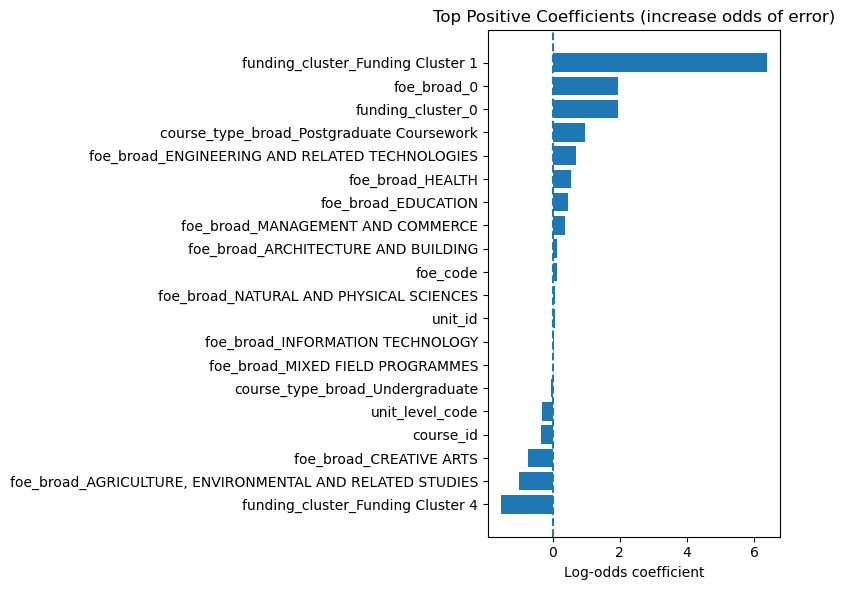

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def get_feature_names_from_ct(ct, num_feats, cat_feats, ct_num_name='num', ct_cat_name='cat'):
    names = []
    names += list(num_feats)
    ohe = ct.named_transformers_[ct_cat_name]
    cat_expanded = list(ohe.get_feature_names_out(cat_feats))
    names += cat_expanded
    return names

feature_names = get_feature_names_from_ct(
    ct=clf.named_steps['prep'],
    num_feats=numeric_feats,
    cat_feats=categorical_feats,
    ct_num_name='num',
    ct_cat_name='cat'
)
coefs = clf.named_steps['logit'].coef_.ravel()

odds = np.exp(coefs)
effect_df = pd.DataFrame({
    'feature': feature_names,
    'coef': coefs,
    'odds_ratio': odds,
    'abs_coef': np.abs(coefs)
}).sort_values('abs_coef', ascending=False)
print(effect_df.head(15))  

TOP_N = 20
top_pos = effect_df.sort_values('coef', ascending=False).head(TOP_N)
top_neg = effect_df.sort_values('coef', ascending=True).head(TOP_N)

plt.figure(figsize=(8, 6))
plt.barh(top_pos['feature'][::-1], top_pos['coef'][::-1])
plt.axvline(0, linestyle='--')
plt.title('Top Positive Coefficients (increase odds of error)')
plt.xlabel('Log-odds coefficient')
plt.tight_layout()
plt.show()

# What does this model tell us?
Management & Commerce units (OR ~ 88) is very high error risk in this faculty.
Education (OR  0.028), Creative Arts (0.043) is much lower odds of error.
Agriculture/Environment (0.137), Architecture (0.32), Society & Culture (0.35) and also protective (lower error odds).
Information Technology (OR ~ 2.27) higher odds of error.
Programme level: Postgrad Coursework (0.60) slightly reduces error odds.
Unit level code (1.63) higher unit levels modestly increase odds.

# Based from the model and we get
The largest positive coefficients are 4.07, 2.74 and 2.32 which are foe broad management and commerce, foe broad 0 and foe code. When these feature increase, your model is much more likely to predict class 1 and the negative coefficients are around -2.66, 2.35, -2.11 which are creative arts, education and agriculture, environmental and related studies.

In [60]:
from sklearn.model_selection import train_test_split

feature_cols = ["course_type_broad", "unit_level_code", "foe_broad", "foe_code", "unit_id", "course_id", "funding_cluster"]
target_col = "error_flag"
CSP_Student_rt = CSP_Student.dropna(subset=feature_cols + [target_col]).copy()

X = CSP_Student_rt[feature_cols]
y = CSP_Student_rt[target_col].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=42,stratify=y)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (7896, 7)
Test set size: (2632, 7)


In [61]:
# Random Forest
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (classification_report, confusion_matrix, roc_auc_score)

numeric_feats = X_train.select_dtypes(include=[np.number]).columns.tolist()
categorical_feats = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
preprocess = ColumnTransformer(transformers=[('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_feats)],remainder='passthrough')

rf = RandomForestClassifier(n_estimators=400,max_depth=None,min_samples_split=2,min_samples_leaf=1,class_weight='balanced',n_jobs=-1,random_state=42)
rf_clf = Pipeline(steps=[('prep', preprocess),('rf', rf)])
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)
y_proba = rf_clf.predict_proba(X_test)[:, 1]

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=3))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))


Confusion Matrix:
 [[1492   36]
 [  85 1019]]

Classification Report:
               precision    recall  f1-score   support

           0      0.946     0.976     0.961      1528
           1      0.966     0.923     0.944      1104

    accuracy                          0.954      2632
   macro avg      0.956     0.950     0.952      2632
weighted avg      0.954     0.954     0.954      2632

ROC AUC Score: 0.9843984155664314


In [62]:
def get_feature_names(preprocessor, cat_cols, num_cols):
    names = []
    if cat_cols:
        ohe = preprocessor.named_transformers_['cat']
        names.extend(ohe.get_feature_names_out(cat_cols))
    names.extend(num_cols)
    return names

feature_names = get_feature_names(rf_clf.named_steps['prep'], categorical_feats, numeric_feats)
importances = rf_clf.named_steps['rf'].feature_importances_

feat_imp = (pd.DataFrame({'feature': feature_names, 'importance': importances})
              .sort_values('importance', ascending=False)
              .reset_index(drop=True))

print("\nTop 20 features by importance:")
print(feat_imp.head(20))


Top 20 features by importance:
                                              feature  importance
0                   funding_cluster_Funding Cluster 1        0.26
1                                            foe_code        0.19
2                   funding_cluster_Funding Cluster 3        0.13
3                                           course_id        0.11
4                   funding_cluster_Funding Cluster 2        0.09
5                                             unit_id        0.06
6             foe_broad_NATURAL AND PHYSICAL SCIENCES        0.03
7                   foe_broad_MANAGEMENT AND COMMERCE        0.02
8                                     unit_level_code        0.02
9                       foe_broad_SOCIETY AND CULTURE        0.02
10                                        foe_broad_0        0.02
11                                  funding_cluster_0        0.02
12  foe_broad_AGRICULTURE, ENVIRONMENTAL AND RELAT...        0.01
13                            foe_broad_CREA

# Result from Random forest model
The model shows that foe code and funding cluster 1 have highly associated with the occurrence of errors and has the strongest influence in predicting error flags.Therefore, it should be prioritized for further investigation or corrective action.

# Result from both model
Both models agree in foe code should be prioritized for further investigation
Logistic regression tells you that errors which are even more likely came from these features foe broad management and commerce, foe broad 0 and foe code.
Random Forest strips it down you can explain more than half is came from foe code, course id and unit id also need to betake action

In [63]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

feature_cols = ["course_type_broad", "unit_level_code", "foe_broad", "foe_code", "unit_id", "course_id", "funding_cluster"]
target_col = "error_flag" 
CSP_Student_reg = CSP_Student.dropna(subset=feature_cols + [target_col]).copy()

X = CSP_Student_reg[feature_cols]
y = CSP_Student_reg[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=42)

numeric_feats = X_train.select_dtypes(include=[np.number]).columns.tolist()
categorical_feats = X_train.select_dtypes(include=["object", "category"]).columns.tolist()

preprocess = ColumnTransformer(transformers=[("num", "passthrough", numeric_feats),('cat', OneHotEncoder(handle_unknown='ignore'), categorical_feats)])
rf_pipeline = Pipeline(steps=[('preprocess', preprocess),('model', RandomForestRegressor(n_estimators=2000,max_depth=None,random_state=42,n_jobs=-1))])
rf_pipeline.fit(X_train, y_train)
y_pred = rf_pipeline.predict(X_test)

print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Root Mean Square Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))


Mean Absolute Error (MAE): 0.0633449848024316
Root Mean Square Error (RMSE): 0.1853992892827946
R² Score: 0.8579397981505346


In [64]:
import pandas as pd

importances = rf_pipeline.named_steps['model'].feature_importances_
feat_names = rf_pipeline.named_steps['preprocess'].get_feature_names_out()
fi_df = pd.DataFrame({'feature': feat_names, 'importance': importances})
fi_df = fi_df.sort_values(by='importance', ascending=False)
print(fi_df.head(10))

                                              feature  importance
19             cat__funding_cluster_Funding Cluster 1        0.67
6                                    cat__foe_broad_0        0.06
3                                      num__course_id        0.06
2                                        num__unit_id        0.06
18                             cat__funding_cluster_0        0.06
1                                       num__foe_code        0.05
0                                num__unit_level_code        0.02
12                              cat__foe_broad_HEALTH        0.01
11  cat__foe_broad_ENGINEERING AND RELATED TECHNOL...        0.00
4      cat__course_type_broad_Postgraduate Coursework        0.00


# Result from random forest regression
Mean and Root mean square error show the data is fitting and learning the data pattern very well with aroun 86 in R squared scored, which is very strong predictive power.
The main driver (num_foe_code = 0.75) should be carefully monitored, maintained, or optimized because it has the largest impact on the forecasted outcome. course_id and unit_id are the next features that need to take noted.

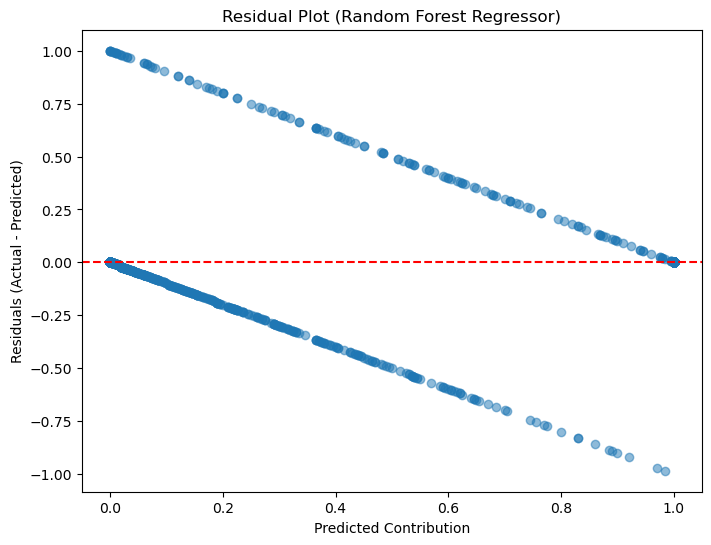

In [44]:
# Residual Plot
import matplotlib.pyplot as plt

residuals = y_test - y_pred
plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Contribution")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot (Random Forest Regressor)")
plt.show()


# result from the plot
based from the result, foe code make the model predicted sometimes overestimated and something underestimated. Which is need to take this action as priority for further investment